In [ ]:
%pip install funpymodeling
%pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
from google.colab import files
files.upload()

# **Agregar el archivo: microretailer_mit_lift_lab.xlsx**

In [4]:
#Comenzamos leyendo el archivo y mostrando las primeras 5 filas
df=pd.read_excel("microretailer_mit_lift_lab.xlsx")
df.head(5)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [5]:
#Comenzamos seleccionando las 20 variables categóricas con las que estaremos trabajando
df_2= ['232_type_of_store','108_does_the_micro_retailer_has_a_barred_window_','99_does_the_micro_retailer_exhibits_products_outside_','102_does_the_micro_retailer_sells_fresh_products_','184_store_devices','5_change_store_space_last_year','6_change_employees_average_salary_last_year','18_sales_records','145_number_direct_competitors','186_internet_connection', '49_inventory_records','210_sales_channels','189_payment_methods','214_customer_relationship_tools','_title','193_sales_planning_tools','60_services','69_why_not_services','158_charact_organize_products_on_shelves','161_actions_stockouts']
df2= df[df_2]
df2.head(5)

,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,5_change_store_space_last_year,6_change_employees_average_salary_last_year,18_sales_records,145_number_direct_competitors,186_internet_connection,49_inventory_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,_title,193_sales_planning_tools,60_services,69_why_not_services,158_charact_organize_products_on_shelves,161_actions_stockouts
0,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,3.0,yes,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,"November 12, 2022",Software especializado,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...
1,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),Aumentó 15%,No cambió,No lo hago,4.0,yes,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,"November 12, 2022",NaN,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo..."
2,Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",No cambió,No cambió,Software especializado + computadora,0.0,yes,En Excel,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,"November 12, 2022",NaN,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta
3,Grocery store (aka. nanostore),no,no,no,POS system (i.e. computer + bar code scanner +...,No cambió,No cambió,Software especializado + computadora,4.0,yes,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,"November 12, 2022",Ninguna,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto
4,Grocery store (aka. nanostore),yes,no,no,Smartphone,No cambió,No cambió,En papel,0.0,yes,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,"November 12, 2022",NaN,NaN,NaN,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie..."


In [6]:
#Se identifican los tipos de dato de las columnas
print(df2.dtypes)

232_type_of_store                                         object
108_does_the_micro_retailer_has_a_barred_window_          object
99_does_the_micro_retailer_exhibits_products_outside_     object
102_does_the_micro_retailer_sells_fresh_products_         object
184_store_devices                                         object
5_change_store_space_last_year                            object
6_change_employees_average_salary_last_year               object
18_sales_records                                          object
145_number_direct_competitors                            float64
186_internet_connection                                   object
49_inventory_records                                      object
210_sales_channels                                        object
189_payment_methods                                       object
214_customer_relationship_tools                           object
_title                                                    object
193_sales_planning_tools 

# **Aplicar métodos para reemplazar valores nulos del dataframe**

In [7]:
#Convertimos la columna 145_number_direct_competitors a object
df2['145_number_direct_competitors'] = df2['145_number_direct_competitors'].astype(object)

#Procedemos a identificar nulos
print(df2.isnull().sum())

232_type_of_store                                          0
108_does_the_micro_retailer_has_a_barred_window_           0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
184_store_devices                                          2
5_change_store_space_last_year                            72
6_change_employees_average_salary_last_year               86
18_sales_records                                          61
145_number_direct_competitors                             68
186_internet_connection                                   63
49_inventory_records                                      61
210_sales_channels                                        89
189_payment_methods                                       64
214_customer_relationship_tools                           76
_title                                                     0
193_sales_planning_tools                                  89
60_services             

<ipython-input-7-5eec3545dda8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['145_number_direct_competitors'] = df2['145_number_direct_competitors'].astype(object)


In [8]:
#En este caso como todos los valores son tipo "Object"
#sustituiremos los nulos por un string concreto
df2=df2.fillna('Unknow')
print(df2.isnull().sum())

232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
184_store_devices                                        0
5_change_store_space_last_year                           0
6_change_employees_average_salary_last_year              0
18_sales_records                                         0
145_number_direct_competitors                            0
186_internet_connection                                  0
49_inventory_records                                     0
210_sales_channels                                       0
189_payment_methods                                      0
214_customer_relationship_tools                          0
_title                                                   0
193_sales_planning_tools                                 0
60_services                                             

In [9]:
#En este caso como se trabajará con valor tipo "object" no contamos con outliers

# Extraer características a partir de aplicar un análisis univariado

**"232_type_of_store"**

Tipos de tiendas en nuestro dataframe



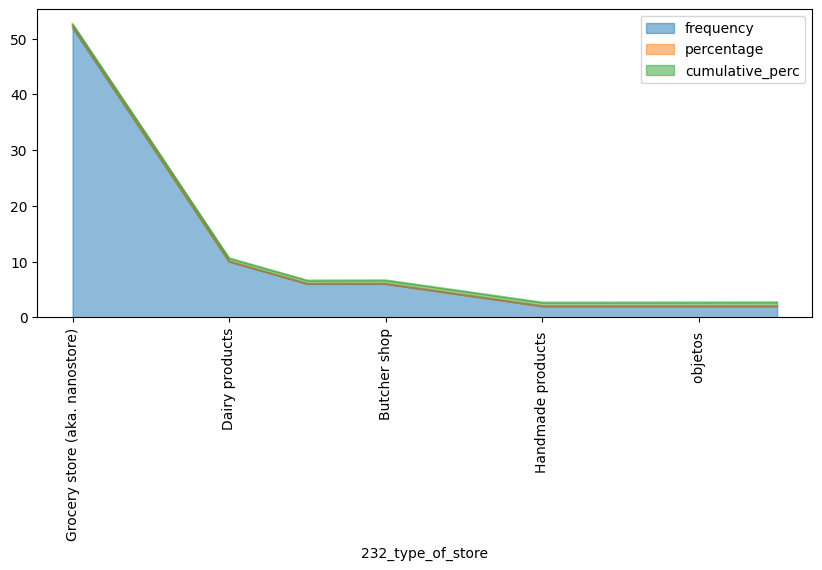

In [10]:
table1= freq_tbl(df2['232_type_of_store'])
#Realizamos grafico de área pero solo filtramos los que tengan una frecuencia mayor a 1
filtro1= table1[table1['frequency']>1]

Filtro_index= filtro1.set_index('232_type_of_store')
#Giramos las etiquetas a 90 grados para visualizar mejor los datos
ax=Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


**"108_does_the_micro_retailer_has_a_barred_window_"**

¿El micro minorista tiene una ventana con barrotes?


<Axes: ylabel='frequency'>

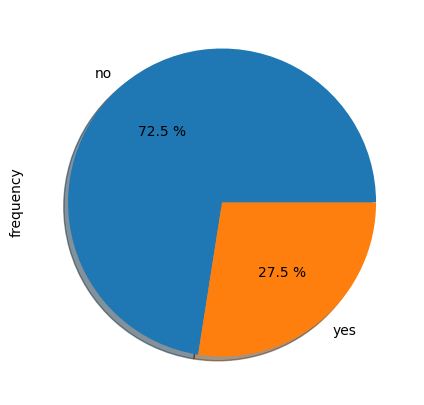

In [11]:
table2= freq_tbl(df2['108_does_the_micro_retailer_has_a_barred_window_'])

#Piechart
Filtro_index2= table2.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro_index2["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**99_does_the_micro_retailer_exhibits_products_outside_**

¿El micro minorista exhibe productos afuera?

Text(0, 0.5, 'Frecuencia')

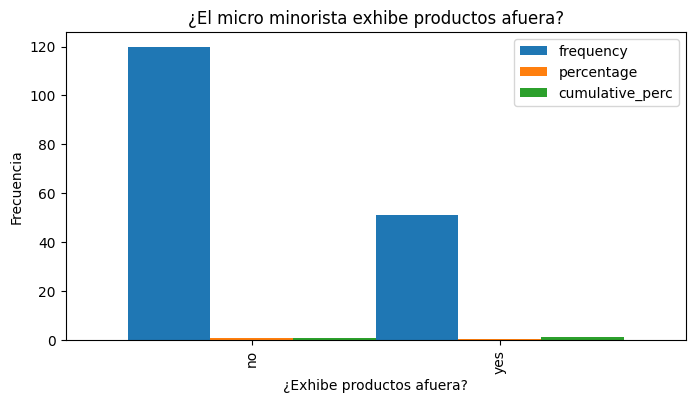

In [12]:
table3= freq_tbl(df2['99_does_the_micro_retailer_exhibits_products_outside_'])
Filtro_index3= table3.set_index('99_does_the_micro_retailer_exhibits_products_outside_')

#Grafico de barras
Filtro_index3.plot(kind = 'bar', width=1, figsize=(8,4))
plt.title('¿El micro minorista exhibe productos afuera?')
plt.xlabel('¿Exhibe productos afuera?')
plt.ylabel('Frecuencia')

**102_does_the_micro_retailer_sells_fresh_products_**

¿El micro minorista vende productos frescos?

Text(0, 0.5, 'Frecuencia')

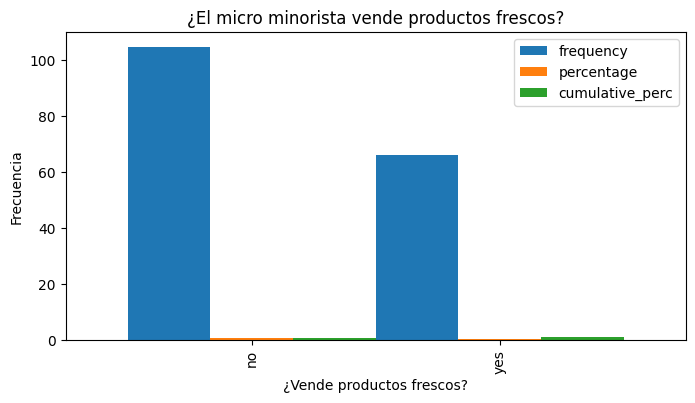

In [13]:
table4= freq_tbl(df2['102_does_the_micro_retailer_sells_fresh_products_'])
Filtro_index4= table4.set_index('102_does_the_micro_retailer_sells_fresh_products_')

#Grafico de barras
Filtro_index4.plot(kind = 'bar', width=1, figsize=(8,4))
plt.title('¿El micro minorista vende productos frescos?')
plt.xlabel('¿Vende productos frescos?')
plt.ylabel('Frecuencia')

184_store_devices

Dispositivos de la tienda

In [14]:
table5= freq_tbl(df2['184_store_devices'])

#Filtramos para excluir los datos que contengan no,Unknow,ninguno,etc. y donde la frecuencia sea mayor a 2
table5 = table5[(table5['184_store_devices'] != 'no') & (table5['184_store_devices'] != 'Unknow')&(table5['184_store_devices'] != 'Nothing')&(table5['184_store_devices'] != 'ninguno')&(table5['184_store_devices'] != 'no tiene')&(table5['184_store_devices'] != 'Nothing')&(table5['184_store_devices'] != 'no cuenta con dispositivos')&(table5['frequency'] > 2)]
Filtro_index5= table5.set_index('184_store_devices')
Filtro_index5


,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123
"POS system (i.e. computer + bar code scanner + printer),Security cameras,Smartphone",4,0.023392,0.672515


**5_change_store_space_last_year**

¿Cambió el espacio de la tienda en el ultimo año?

<Axes: ylabel='percentage'>

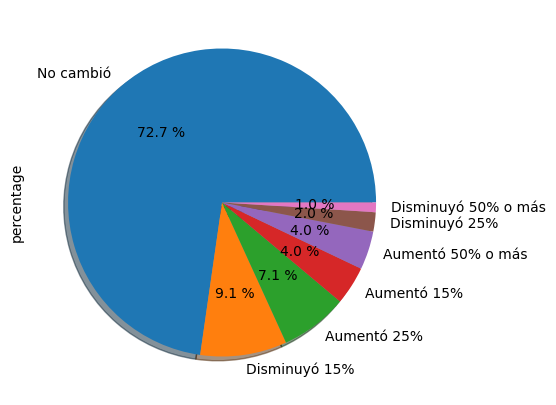

In [15]:
#42% de los datos son unknow
table6= freq_tbl(df2['5_change_store_space_last_year'])

#Filtramos los datos que no sean Unknow
table6= table6[table6['5_change_store_space_last_year']!="Unknow"]
Filtro_index6= table6.set_index('5_change_store_space_last_year')
Filtro_index6["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


**6_change_employees_average_salary_last_year**

¿Cambió el salario promedio de los empleados el último año?

(0.0, 80.0)

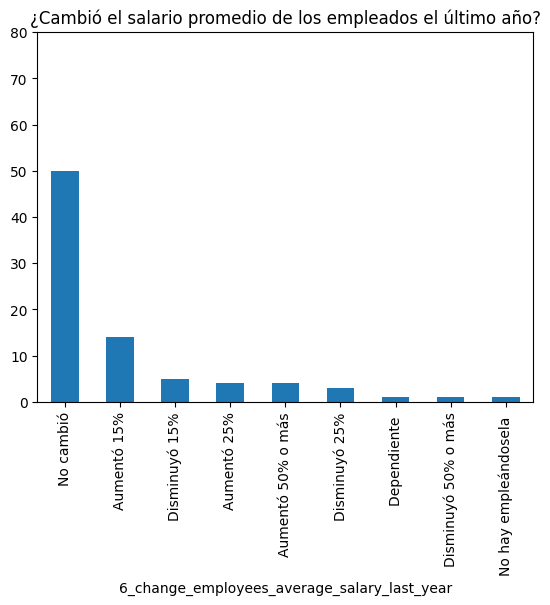

In [16]:
#50% de los datos son unknow
table7= freq_tbl(df2['6_change_employees_average_salary_last_year'])

#Filtramos somo los datos que sean relevantes
table7= table7[(table7['6_change_employees_average_salary_last_year'] != "Unknow") & (table7['6_change_employees_average_salary_last_year'] != "40")&(table7['6_change_employees_average_salary_last_year'] != "0")]

#Realizamos una gráfica de barras para representar los datos
Filtro_index7= table7.set_index('6_change_employees_average_salary_last_year')
plot = Filtro_index7['frequency'].plot(kind='bar', title='¿Cambió el salario promedio de los empleados el último año?',
                                x='¿Cambió el salario promedio de los empleados el último año?')
plot.set_ylim(0, 80)


**18_sales_records**

Registros de Venta

Text(0, 0.5, 'Frecuencia')

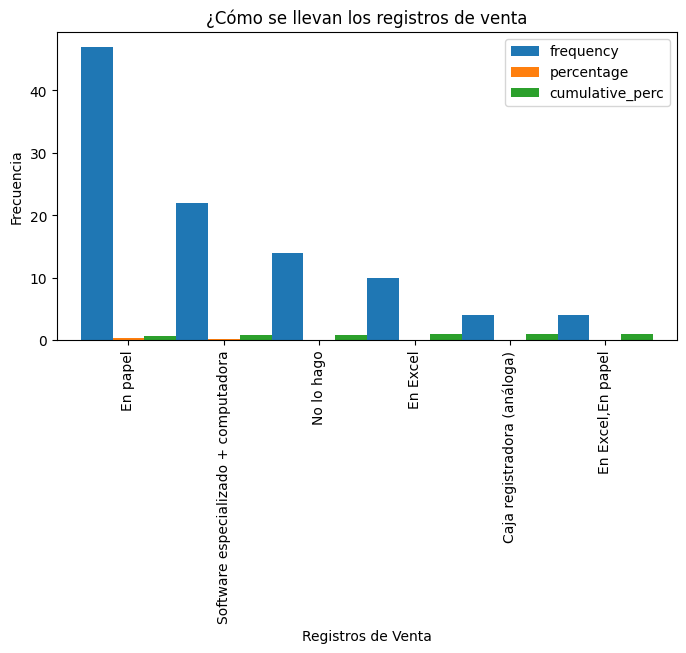

In [17]:
#35% de los datos son unknow
table8= freq_tbl(df2['18_sales_records'])

#Filtramos los datos que son Unknow y mayores a 1
table8= table8[(table8['18_sales_records'] != "Unknow")&(table8['frequency'] >1)]
Filtro_index8= table8.set_index('18_sales_records')

#Grafico de barras
Filtro_index8.plot(kind = 'bar', width=1, figsize=(8,4))
plt.title('¿Cómo se llevan los registros de venta')
plt.xlabel('Registros de Venta')
plt.ylabel('Frecuencia')

**145_number_direct_competitors**

Numero de competidores directos

<Axes: ylabel='frequency'>

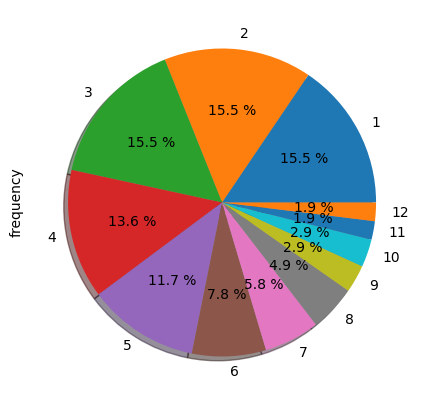

In [18]:
#39% de los datos son unknow
table9= freq_tbl(df2['145_number_direct_competitors'])

#Filtramos los datos que no sean Unknow
table9= table9[(table9['145_number_direct_competitors'] != "Unknow")]

#Convertimos a int la columna 145_number_direct_competitors
table9['145_number_direct_competitors'] = table9['145_number_direct_competitors'].astype(int)

#Piechart
table9["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**186_internet_connection**

Conexión a internet

Text(0, 0.5, 'Frecuencia')

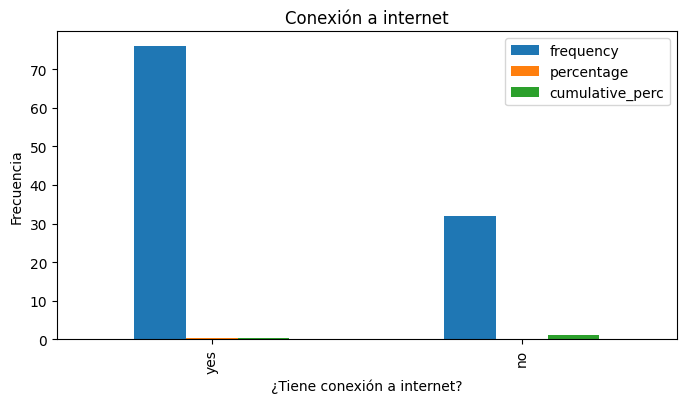

In [19]:
#36% de los datos son unknow
table10= freq_tbl(df2['186_internet_connection'])

#Filtramos los datos que no sean Unknow y fijamos indice
table10= table10[(table10['186_internet_connection'] != "Unknow")]
Filtro_index10= table10.set_index('186_internet_connection')

#Grafica de barras
Filtro_index10.plot(kind = 'bar', width=.5, figsize=(8,4))
plt.title('Conexión a internet')
plt.xlabel('¿Tiene conexión a internet?')
plt.ylabel('Frecuencia')


**49_inventory_records**

Registro de Inventario

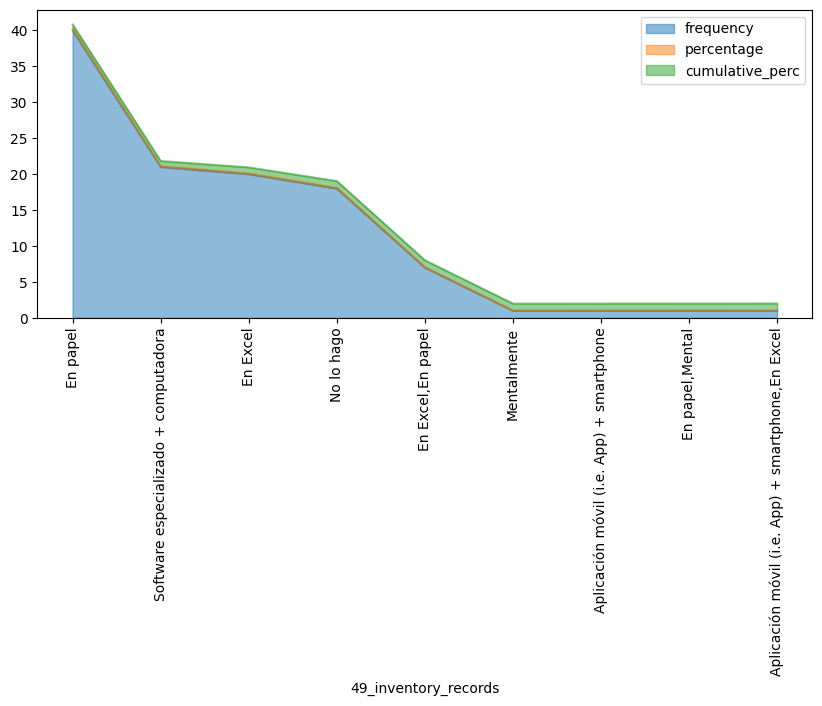

In [20]:
#35% de los registros son unknow
table11= freq_tbl(df2['49_inventory_records'])

#Filtramos los datos que sean Unknow
table11= table11[(table11['49_inventory_records'] != "Unknow")]

#Realizamos grafico de área del dataframe filtrado
Filtro_index11= table11.set_index('49_inventory_records')
ax=Filtro_index11.plot(kind='area', figsize=(10,4),alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**210_sales_channels**

Canales de Venta

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

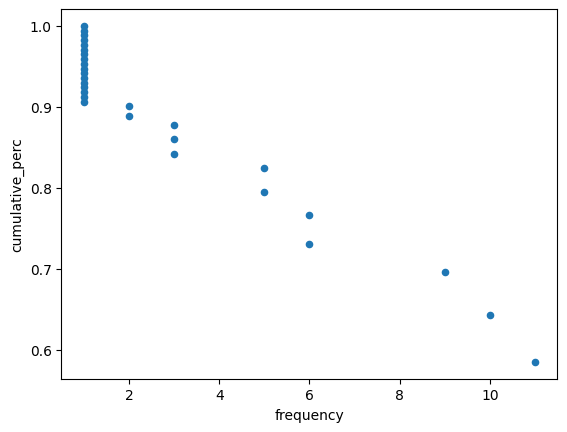

In [21]:
#Más del 50% de los datos son Unknow
table12= freq_tbl(df2['210_sales_channels'])
table12=table12[(table12['210_sales_channels'] != "Unknow")]
Filtro_index12= table12.set_index('210_sales_channels')

#Scatterplot
Filtro_index12.plot("frequency", "cumulative_perc", kind="scatter")


**189_payment_methods**

Métodos de pago

Text(0, 0.5, 'Frecuencia')

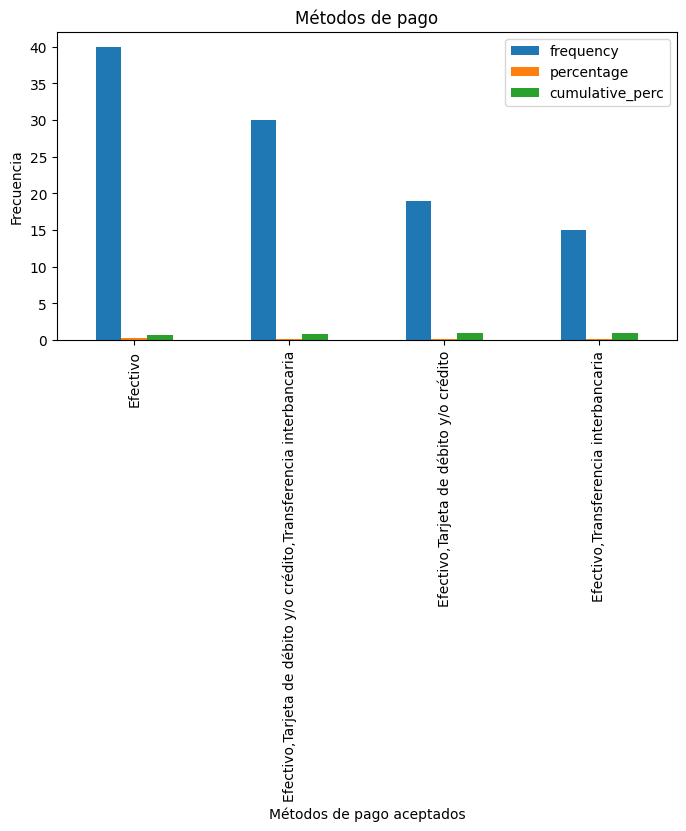

In [22]:
#37% de los datos son Unknow
table13= freq_tbl(df2['189_payment_methods'])

#Filtramos los datos que sean no sean Unknow y su frecuencia sea mayor a 1
table13= table13[(table13['189_payment_methods'] != "Unknow")&(table13['frequency'] >1)]

Filtro_index13= table13.set_index('189_payment_methods')
#Grafica de barras
Filtro_index13.plot(kind = 'bar', width=.5, figsize=(8,4))
plt.title('Métodos de pago')
plt.xlabel('Métodos de pago aceptados')
plt.ylabel('Frecuencia')

**214_customer_relationship_tools**

Herramientas de relación con los clientes


<Axes: ylabel='frequency'>

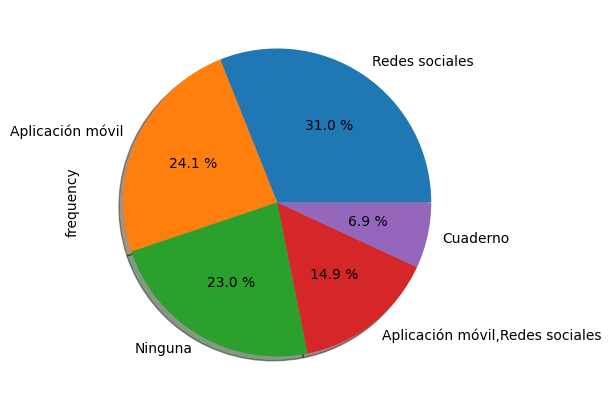

In [23]:
#44% de datos Unknow
table14= freq_tbl(df2['214_customer_relationship_tools'])

#Filtramos los datos que sean no sean Unknow y su frecuencia sea mayor a 1
table14= table14[(table14['214_customer_relationship_tools'] != "Unknow")&(table14['frequency'] >1)]
Filtro_index14=table14.set_index('214_customer_relationship_tools')

#Piechart
Filtro_index14["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**_title**

Fecha de Registro

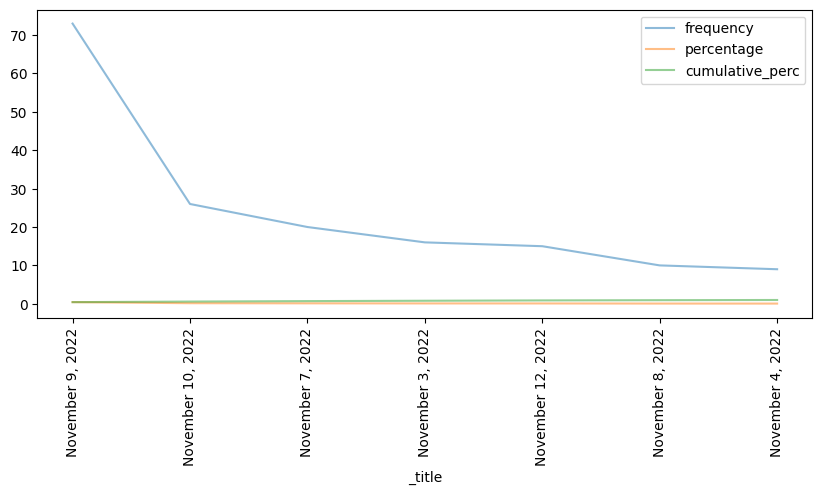

In [24]:
table15= freq_tbl(df2['_title'])
#Filtramos para obtener las frecuencias mayores a 1
table15= table15[(table15['frequency'] > 1)]

#Fijamos el índice
Filtro_index15=table15.set_index('_title')

#Realizamos grafico de área
ax=Filtro_index15.plot(kind='line', figsize=(10,4),alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**193_sales_planning_tools**

Herramientas de Planificación de Ventas'

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ninguna'),
  Text(1, 0, 'Cuaderno'),
  Text(2, 0, 'Software especializado'),
  Text(3, 0, 'Excel'),
  Text(4, 0, 'Cuaderno,Excel'),
  Text(5, 0, 'Cuaderno,Ninguna')])

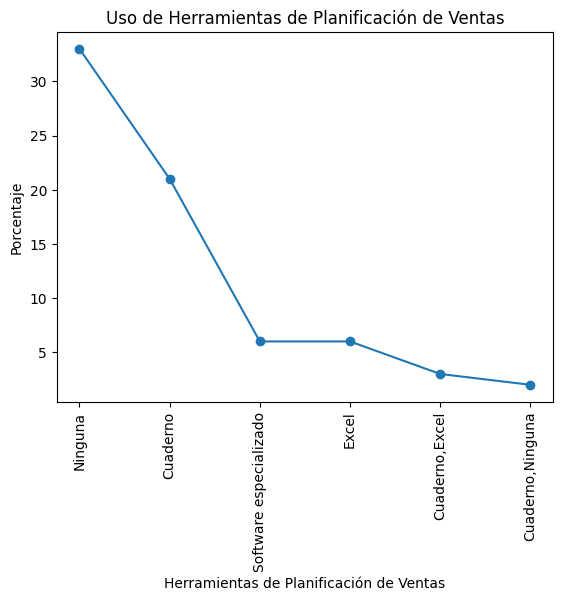

In [25]:
#52% de datos Unknow
table16= freq_tbl(df2['193_sales_planning_tools'])

#Filtramos para obtener las frecuencias mayores a 1 y que no sean Unknow
table16= table16[(table16['frequency'] > 1)&(table16['193_sales_planning_tools'] !="Unknow")]

#Grafico de lineas
plt.plot(table16['193_sales_planning_tools'], table16['frequency'], marker='o', linestyle='-')
plt.title('Uso de Herramientas de Planificación de Ventas')
plt.xlabel('Herramientas de Planificación de Ventas')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)


**60_services**

Servicios extra

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

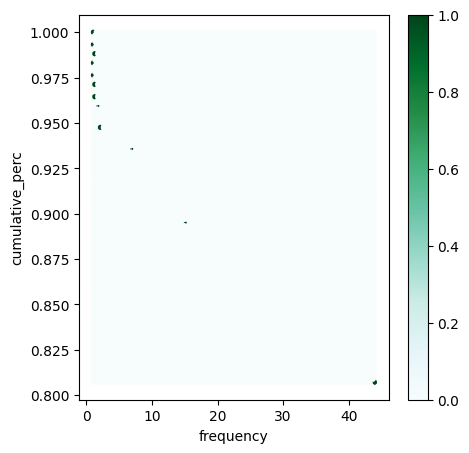

In [26]:
#54% de los datos son Unknow
table17= freq_tbl(df2['60_services'])
#Filtramos datos que no sean Unknow
table17= table17[(table17['60_services'] !="Unknow")]
Filtro_index17=table17.set_index('60_services')

#Realizamos grafico hexagonal
Filtro_index17.plot.hexbin("frequency", "cumulative_perc", figsize=(5,5))

**69_why_not_services**

¿Por qué no brindo Servicios extra?

<Axes: ylabel='frequency'>

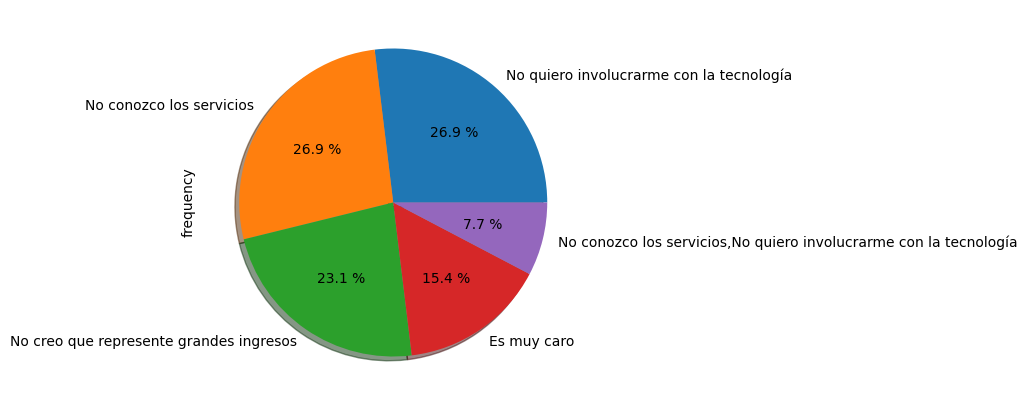

In [27]:
#76% de los datos son Unknow
table18= freq_tbl(df2['69_why_not_services'])

#Filtramos los datos que sean no sean Unknow y su frecuencia sea mayor a 1
table18= table18[(table18['69_why_not_services'] != "Unknow")& (table18['frequency'] >1)]
Filtro_index18=table18.set_index('69_why_not_services')

#Piechart
Filtro_index18["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**158_charact_organize_products_on_shelves**

¿Cómo organiza sus productos en estantes?

Text(0, 0.5, 'Frecuencia')

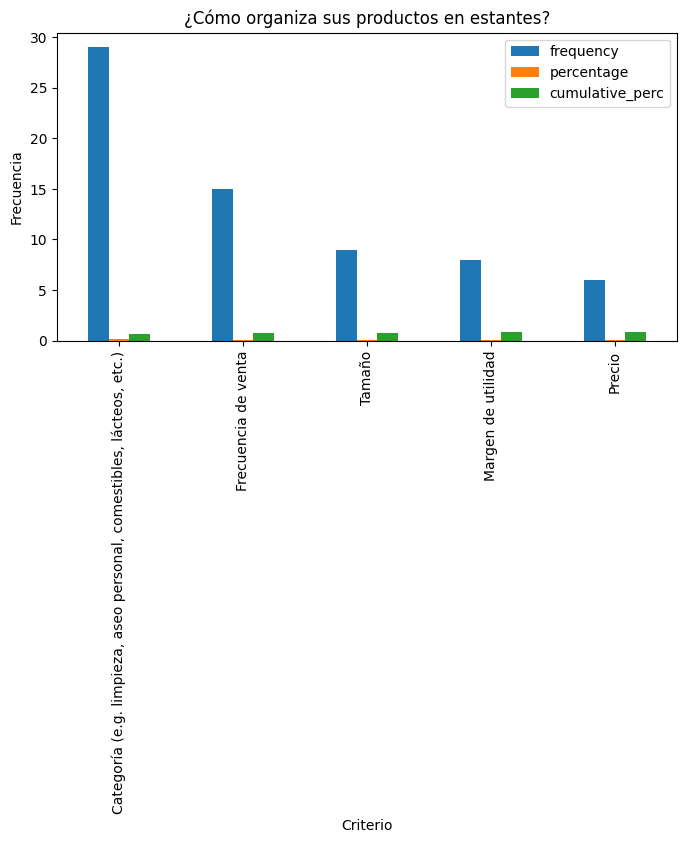

In [28]:
#46% de los datos son unknow
table19= freq_tbl(df2['158_charact_organize_products_on_shelves'])

#Filtramos los datos que sean no sean Unknow y su frecuencia sea mayores a 5
table19= table19[(table19['158_charact_organize_products_on_shelves'] != "Unknow")&(table19['frequency'] > 5)]
Filtro_index19=table19.set_index('158_charact_organize_products_on_shelves')

Filtro_index19.plot(kind = 'bar', width=.5, figsize=(8,4))
plt.title('¿Cómo organiza sus productos en estantes?')
plt.xlabel('Criterio')
plt.ylabel('Frecuencia')

**161_actions_stockouts**

Acciones ante  desabastecimientos

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

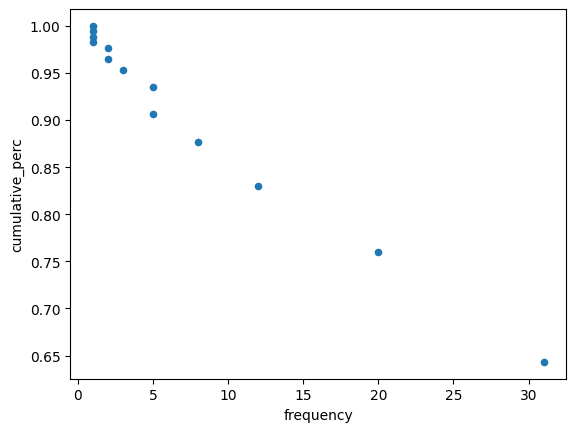

In [29]:
#46% de los datos son Unknow
table20= freq_tbl(df2['161_actions_stockouts'])

table20= table20[(table20['161_actions_stockouts'] != "Unknow")]
Filtro_index20= table20.set_index('161_actions_stockouts')

#Scatterplot
Filtro_index20.plot("frequency", "cumulative_perc", kind="scatter")

